In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('../data/iowa_housing/train.csv')
test  = pd.read_csv('../data/iowa_housing/test.csv')

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train.shape

(1460, 81)

In [5]:
data = pd.concat([train.iloc[:,:-1], test], axis=0, sort=False)

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [7]:
data.shape

(2919, 80)

In [8]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [9]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond

In [10]:
# find columns with less than 2 unique values
data.loc[:, data.apply(lambda x: x.nunique()) <= 2].head()

,Street,Alley,Utilities,CentralAir
0,Pave,NaN,AllPub,Y
1,Pave,NaN,AllPub,Y
2,Pave,NaN,AllPub,Y
3,Pave,NaN,AllPub,Y
4,Pave,NaN,AllPub,Y


In [11]:
data.shape[0]

2919

In [12]:
# find columns with more than half null values

limit = data.shape[0] * .5
null_cols = []

for col in data.columns:
    if data[col].isnull().sum() > limit:
        null_cols.append(col)

null_cols 

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [13]:
data.drop(['Id','Street','Alley','Utilities','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [14]:
numerical_features = data.select_dtypes(include=['int64','float64'])
categorical_features = data.select_dtypes(include='object')

In [15]:
data.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
                 ... 
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars

In [16]:
# fill NaN values in numerical columns with mean values

from sklearn.impute import SimpleImputer

null_numerical_cols = numerical_features.columns[numerical_features.isna().any()].tolist()

imp = SimpleImputer()
imp = imp.fit(data[null_numerical_cols])
data[null_numerical_cols] = imp.transform(data[null_numerical_cols])

In [17]:
# fill NaN values in categorical columns with 'Other'

null_categorical_cols = categorical_features.columns.tolist()
for col in null_categorical_cols:
    data[col].fillna('Other', inplace=True)

In [18]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

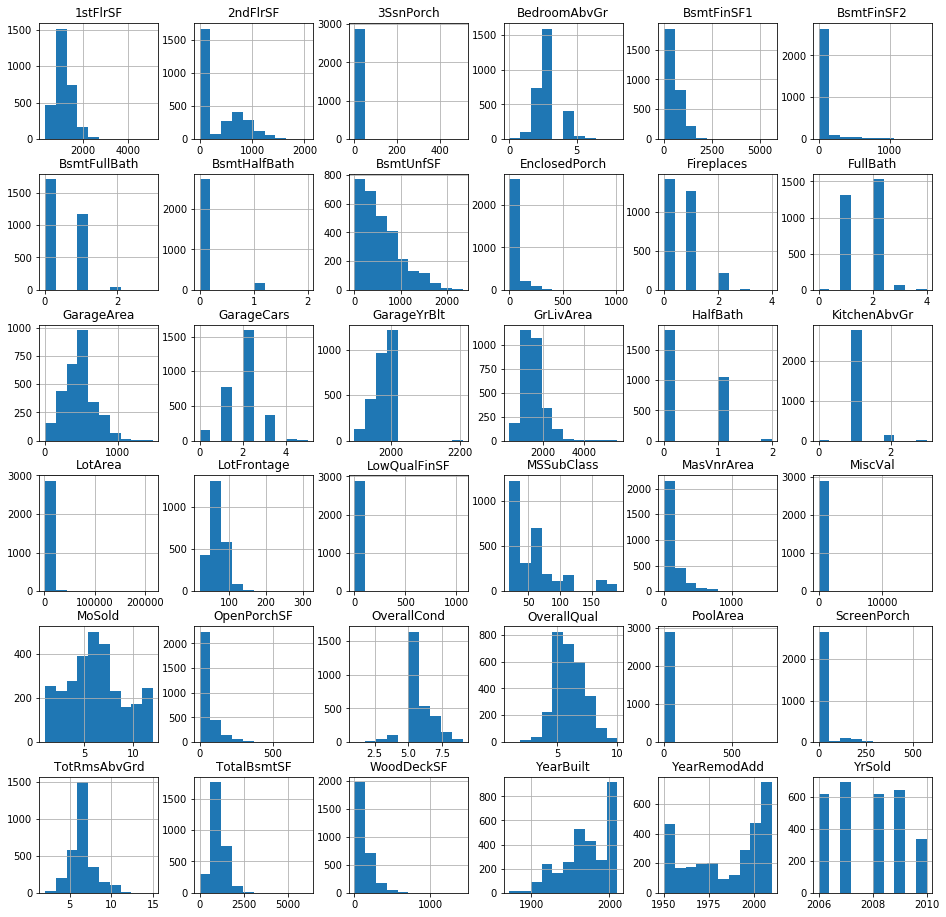

In [19]:
numerical_features.hist(figsize=[16,16]);

In [20]:
# convert categorical data to numerical
categorical_cols = categorical_features.columns.tolist()
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [21]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_Other,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [22]:
data.shape

(2919, 251)

In [23]:
# split data back into train and test sets
split_index = round(data.shape[0]/2)
train_data = data.iloc[:split_index,:]
test_data = data.iloc[split_index:,:]

In [24]:
train_data.shape

(1460, 251)

In [25]:
test_data.shape

(1459, 251)

In [26]:
def rmse(estimator, X, y):
    preds  = estimator.predict(X)
    error = np.sqrt(np.mean((preds - y)**2))
    return error

In [27]:
X = train_data
y = np.log(train['SalePrice'])

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

samples_per_leaf = [1, 5, 10, 15, 25, 50]
rf_scores = []

for num_samples in samples_per_leaf:
    rf.set_params(min_samples_leaf=num_samples)
    scores = cross_val_score(estimator=rf, X=X, y=y, scoring=rmse, cv=10)
    rf_scores.append((np.mean(scores), num_samples))

/Users/erikawei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/erikawei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/erikawei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/erikawei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/erikawei/anaconda3/lib/py

/Users/erikawei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/erikawei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/erikawei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/erikawei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/erikawei/anaconda3/lib/py

In [29]:
rf_scores

[(0.14920370783162112, 1),
 (0.1500794345782976, 5),
 (0.15384284044750016, 10),
 (0.15691073197789823, 15),
 (0.1661394066320607, 25),
 (0.18881561993989038, 50)]

In [30]:
min(rf_scores)

(0.14920370783162112, 1)

In [31]:
rf.set_params(min_samples_leaf=1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
rf.fit(X, y)

/Users/erikawei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [33]:
rf.score(X, y)

0.9745148397034917

In [34]:
importances = pd.DataFrame({
    'Features': X.columns,
    'Importance': rf.feature_importances_
})

importances.sort_values(by=['Importance'], ascending=False)

,Features,Importance
3,OverallQual,0.563851
15,GrLivArea,0.104856
11,TotalBsmtSF,0.054612
25,GarageCars,0.053928
8,BsmtFinSF1,0.026315
12,1stFlrSF,0.016260
2,LotArea,0.013800
5,YearBuilt,0.011343
4,OverallCond,0.009188
194,CentralAir_Y,0.008512


In [35]:
test_data['Prediction'] = rf.predict(test_data)

/Users/erikawei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
np.exp(test_data.Prediction)

0       118947.785300
1       148589.147565
2       182917.374517
3       180860.023869
4       198748.110703
5       184773.943915
6       167421.661651
7       173522.352166
8       189930.741450
9       119064.467003
10      193177.646568
11       93408.918855
12       93536.184374
13      155824.565623
14      152601.076044
15      397150.233232
16      248886.338687
17      323861.294567
18      253541.767860
19      420677.529993
20      304853.696699
21      202587.275561
22      173438.398681
23      180256.218026
24      177332.063809
25      188657.820227
26      300101.114304
27      244208.431775
28      216051.507336
29      201614.238262
            ...      
1429     91628.021687
1430    134808.622408
1431     58583.399598
1432    106616.673457
1433     65237.569549
1434    337909.048129
1435    276541.334560
1436    195960.864591
1437    147444.452098
1438    221076.210346
1439    158115.164917
1440    167057.054513
1441    173730.689934
1442    326612.626940
1443    35

In [37]:
output = pd.DataFrame({
    'Id'       : np.arange(1461, 2920),
    'SalePrice': np.exp(test_data.Prediction)
})

In [38]:
output.head()

,Id,SalePrice
0,1461,118947.785300
1,1462,148589.147565
2,1463,182917.374517
3,1464,180860.023869
4,1465,198748.110703


In [39]:
output.to_csv('../data/iowa_housing/sample_predictions3.csv', index=False)

In [40]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

In [73]:
from sklearn.model_selection import GridSearchCV

# set up the parameters of the model you'd like to fit
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
    #'max_depth': [10, 50, 100, None],
}

In [74]:
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, verbose=100)
grid.fit(X, y)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_features=auto, min_samples_split=2, n_estimators=100 ........
[CV]  max_features=auto, min_samples_split=2, n_estimators=100, score=0.842979268878275, total=   2.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[CV] max_features=auto, min_samples_split=2, n_estimators=100 ........
[CV]  max_features=auto, min_samples_split=2, n_estimators=100, score=0.904907044712132, total=   2.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s
[CV] max_features=auto, min_samples_split=2, n_estimators=100 ........
[CV]  max_features=auto, min_samples_split=2, n_estimators=100, score=0.8999310296218821, total=   2.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s remaining:    0.0s
[CV] max_features=auto, min_samples_split=2, n_estimators=100 ........
[CV]  max_features=aut

[CV]  max_features=auto, min_samples_split=5, n_estimators=100, score=0.9001547259294826, total=   2.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  6.7min remaining:    0.0s
[CV] max_features=auto, min_samples_split=5, n_estimators=100 ........
[CV]  max_features=auto, min_samples_split=5, n_estimators=100, score=0.8410005763117407, total=   1.8s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  6.7min remaining:    0.0s
[CV] max_features=auto, min_samples_split=5, n_estimators=100 ........
[CV]  max_features=auto, min_samples_split=5, n_estimators=100, score=0.8667691668335029, total=   1.8s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  6.8min remaining:    0.0s
[CV] max_features=auto, min_samples_split=5, n_estimators=100 ........
[CV]  max_features=auto, min_samples_split=5, n_estimators=100, score=0.890467332455708, total=   1.9s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  6.8min remaining:    0.0s
[CV] max_features=auto, min_samples_split=5, n_estim

[CV]  max_features=auto, min_samples_split=10, n_estimators=100, score=0.8934505337415785, total=   1.5s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed: 12.8min remaining:    0.0s
[CV] max_features=auto, min_samples_split=10, n_estimators=100 .......
[CV]  max_features=auto, min_samples_split=10, n_estimators=100, score=0.8785663100378214, total=   1.6s
[Parallel(n_jobs=1)]: Done  67 out of  67 | elapsed: 12.8min remaining:    0.0s
[CV] max_features=auto, min_samples_split=10, n_estimators=100 .......
[CV]  max_features=auto, min_samples_split=10, n_estimators=100, score=0.90099670758946, total=   1.6s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed: 12.8min remaining:    0.0s
[CV] max_features=auto, min_samples_split=10, n_estimators=100 .......
[CV]  max_features=auto, min_samples_split=10, n_estimators=100, score=0.8432630880597819, total=   1.6s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed: 12.8min remaining:    0.0s
[CV] max_features=auto, min_samples_split=10, n_e

[CV]  max_features=sqrt, min_samples_split=2, n_estimators=100, score=0.8492591459769129, total=   0.3s
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed: 17.0min remaining:    0.0s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=100 ........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=100, score=0.8594954771510515, total=   0.3s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=500 ........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=500, score=0.8762324962082954, total=   1.5s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=500 ........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=500, score=0.8858012749442394, total=   1.5s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=500 ........
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=500, score=0.8918743509157777, total=   1.5s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=500 ........
[CV]  max_features=sqrt, min_samples_split=2,

[CV]  max_features=sqrt, min_samples_split=5, n_estimators=1000, score=0.8731731099285733, total=   2.5s
[CV] max_features=sqrt, min_samples_split=5, n_estimators=1000 .......
[CV]  max_features=sqrt, min_samples_split=5, n_estimators=1000, score=0.8597671303588754, total=   2.4s
[CV] max_features=sqrt, min_samples_split=5, n_estimators=1000 .......
[CV]  max_features=sqrt, min_samples_split=5, n_estimators=1000, score=0.8850591330134117, total=   2.4s
[CV] max_features=sqrt, min_samples_split=5, n_estimators=1000 .......
[CV]  max_features=sqrt, min_samples_split=5, n_estimators=1000, score=0.8452008064244376, total=   2.4s
[CV] max_features=sqrt, min_samples_split=5, n_estimators=1000 .......
[CV]  max_features=sqrt, min_samples_split=5, n_estimators=1000, score=0.8696624278456397, total=   2.4s
[CV] max_features=sqrt, min_samples_split=10, n_estimators=100 .......
[CV]  max_features=sqrt, min_samples_split=10, n_estimators=100, score=0.868338656263731, total=   0.2s
[CV] max_feature

[CV]  max_features=log2, min_samples_split=2, n_estimators=500, score=0.8768386173555237, total=   1.1s
[CV] max_features=log2, min_samples_split=2, n_estimators=500 ........
[CV]  max_features=log2, min_samples_split=2, n_estimators=500, score=0.8162137665364375, total=   1.1s
[CV] max_features=log2, min_samples_split=2, n_estimators=500 ........
[CV]  max_features=log2, min_samples_split=2, n_estimators=500, score=0.8381154221336834, total=   1.1s
[CV] max_features=log2, min_samples_split=2, n_estimators=500 ........
[CV]  max_features=log2, min_samples_split=2, n_estimators=500, score=0.8593776193764877, total=   1.1s
[CV] max_features=log2, min_samples_split=2, n_estimators=500 ........
[CV]  max_features=log2, min_samples_split=2, n_estimators=500, score=0.8411178883893266, total=   1.1s
[CV] max_features=log2, min_samples_split=2, n_estimators=500 ........
[CV]  max_features=log2, min_samples_split=2, n_estimators=500, score=0.869067426809081, total=   1.1s
[CV] max_features=log2

[CV]  max_features=log2, min_samples_split=5, n_estimators=1000, score=0.8524015693421142, total=   2.2s
[CV] max_features=log2, min_samples_split=10, n_estimators=100 .......
[CV]  max_features=log2, min_samples_split=10, n_estimators=100, score=0.859846723788433, total=   0.2s
[CV] max_features=log2, min_samples_split=10, n_estimators=100 .......
[CV]  max_features=log2, min_samples_split=10, n_estimators=100, score=0.8597130220132772, total=   0.3s
[CV] max_features=log2, min_samples_split=10, n_estimators=100 .......
[CV]  max_features=log2, min_samples_split=10, n_estimators=100, score=0.8676428210361707, total=   0.2s
[CV] max_features=log2, min_samples_split=10, n_estimators=100 .......
[CV]  max_features=log2, min_samples_split=10, n_estimators=100, score=0.8005087314498363, total=   0.2s
[CV] max_features=log2, min_samples_split=10, n_estimators=100 .......
[CV]  max_features=log2, min_samples_split=10, n_estimators=100, score=0.8202426125338181, total=   0.3s
[CV] max_feature

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 500, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=100)

In [75]:
grid.best_params_

{'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 500}

In [79]:
rf.set_params(min_samples_leaf=1, max_features='auto', n_estimators=1000)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [80]:
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [81]:
rf.score(X, y)

0.9828101593446289

In [57]:
test_data.drop(['Prediction'], axis=1, inplace=True)

/Users/erikawei/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [58]:
test_data['Prediction'] = rf.predict(test_data)

/Users/erikawei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
output = pd.DataFrame({
    'Id'       : np.arange(1461, 2920),
    'SalePrice': np.exp(test_data.Prediction)
})

In [60]:
output.to_csv('../data/iowa_housing/sample_predictions4.csv', index=False)